In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

%matplotlib inline

/home/sara/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

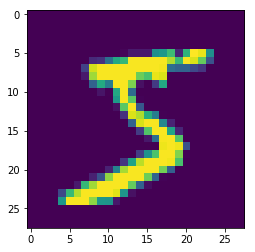

In [3]:
# Some data visualization
plt.imshow(X_train[0])

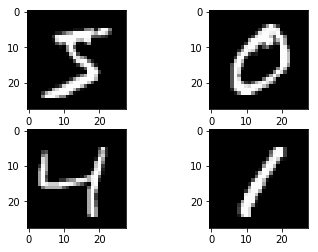

In [5]:
plt.subplot(221)
plt.imshow(X_train[0], cmap= plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(X_train[1], cmap= plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(X_train[2], cmap= plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(X_train[3], cmap= plt.get_cmap('gray'))

# Show the plot
plt.show()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [11]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
X_train /= 255
X_test /= 255

In [14]:
X_train.shape

(60000, 784)

In [15]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [18]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [19]:
batch_size = 128
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [23]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.2478 - acc: 0.9235 - val_loss: 0.1120 - val_acc: 0.9644
Epoch 2/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.1020 - acc: 0.9688 - val_loss: 0.0812 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 20s 341us/step - loss: 0.0753 - acc: 0.9770 - val_loss: 0.0703 - val_acc: 0.9805
Epoch 4/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0601 - acc: 0.9820 - val_loss: 0.0776 - val_acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0511 - acc: 0.9846 - val_loss: 0.0775 - val_acc: 0.9803
Epoch 6/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0418 - acc: 0.9872 - val_loss: 0.0789 - val_acc: 0.9812
Epoch 7/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0400 - acc: 0.9882 - val_loss: 0.

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)

In [25]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1147696326710281
Test accuracy: 0.983
